<a href="https://colab.research.google.com/github/vbhsharma7/bike_sharing_demand_prediction_capstone/blob/main/2_Bike_Sharing_Demand_Prediction_commit4_Capstone_Project_ipynb_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


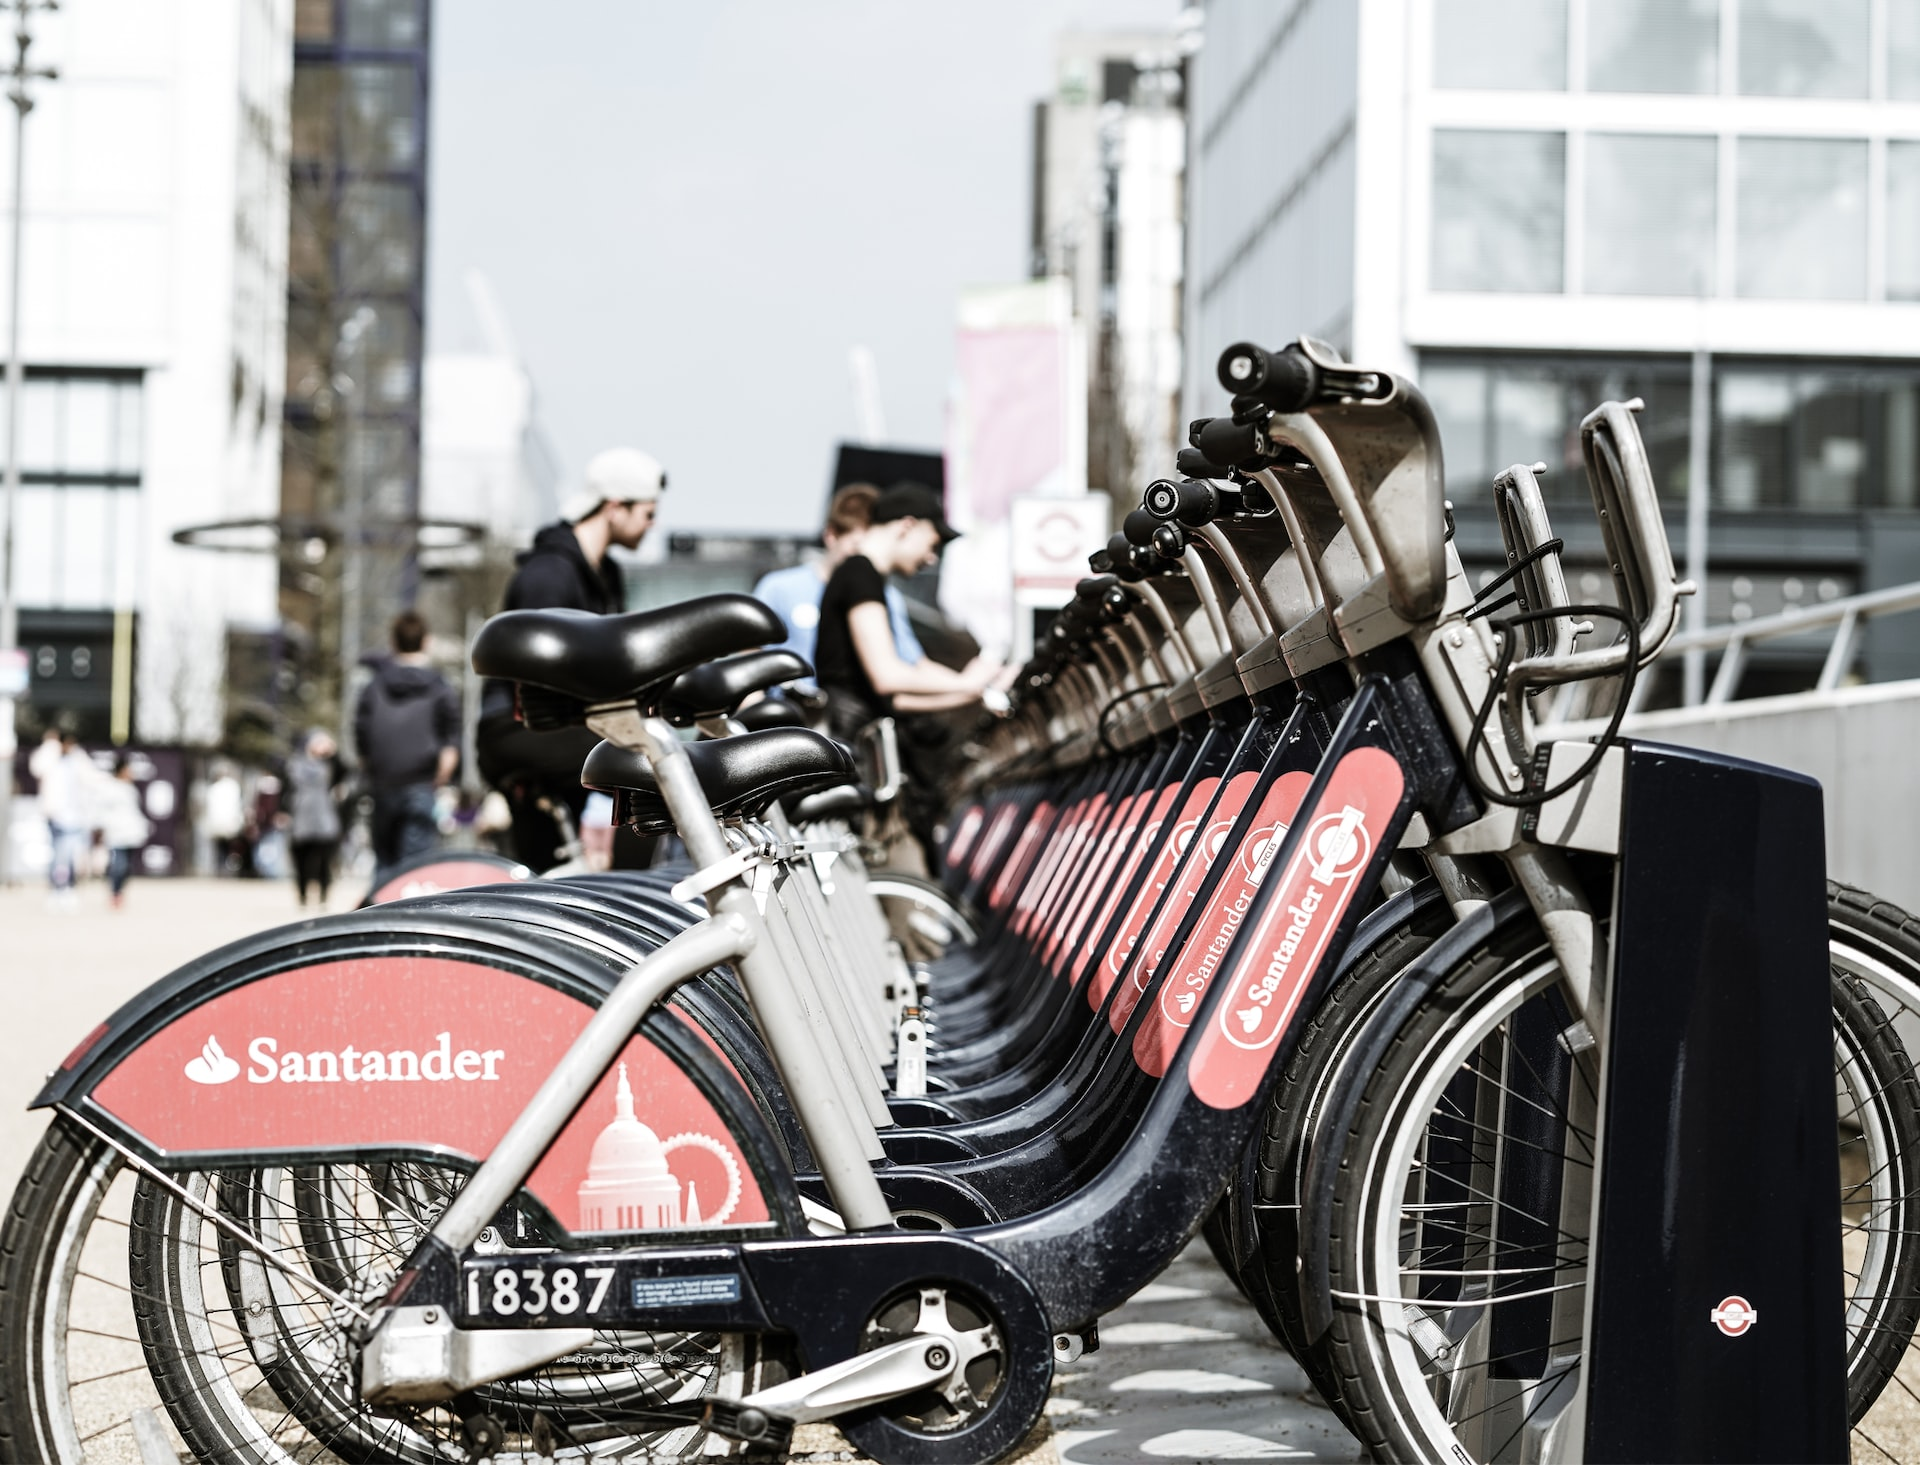

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature- Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset
df_orignal = pd.read_csv('/content/drive/MyDrive/capstone bike sharing/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')


In [4]:
# Making a copy of dataset for safety purpose
df = df_orignal.copy()

In [5]:
df.shape

(8760, 14)

In [6]:
#read and describe the data set
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#Describing the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
#finding the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# checking unique values 
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
# Checking Duplicate Values

print(len(df[df.duplicated()]))


0


#### **Obeservations**:
######We don't have any missing and duplicate values is the dataset.

##**Data Cleaning** 

In [12]:
# Renaming columns for convinence (Camel_Case)
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [13]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [14]:
# Changing date feature into three diffrent feature Day, Month, Year.

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
df=df.drop(columns=['Date','day','year'],axis=1)



In [15]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [16]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [17]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

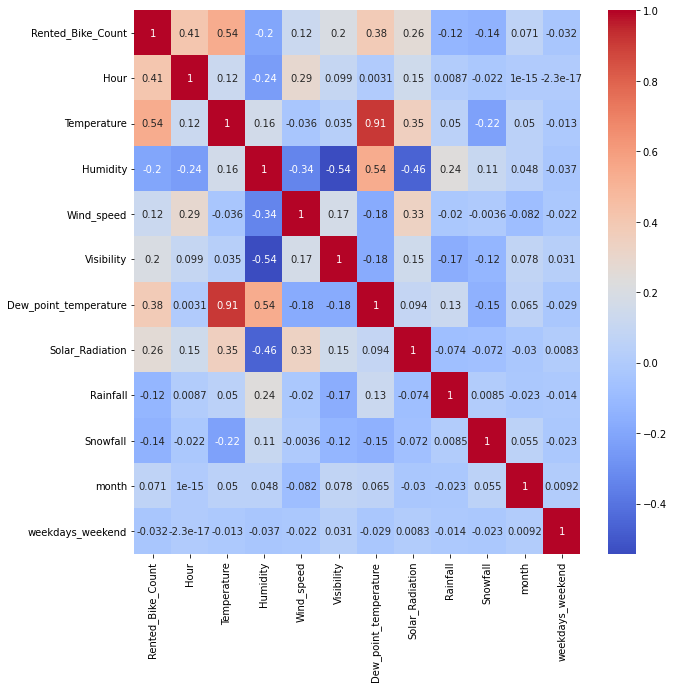

In [18]:
# constructing heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

### Obeservations:
###### Humidity has low co-relation with visibility due to solar radiation.
##### Dew point temperature and temperature are highly related.

In [19]:
# Droping highly co-ralated features for eleminating Multico-linearity
df=df.drop(['Dew_point_temperature'],axis=1)

##**Exploratory Data Analysis**

###**Univariate Analysis :**

In [20]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


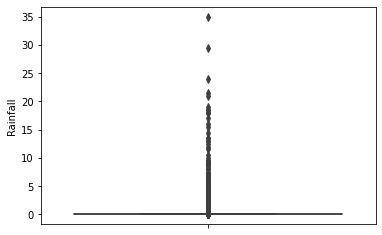

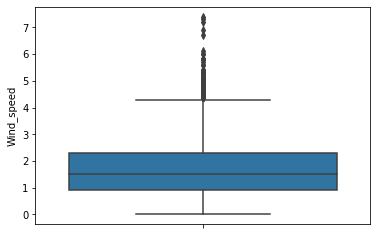

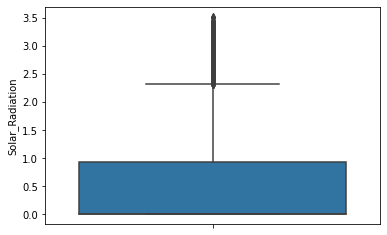

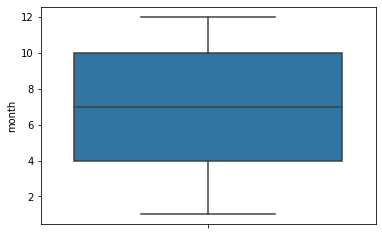

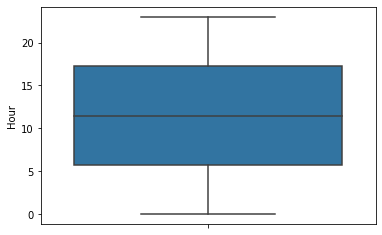

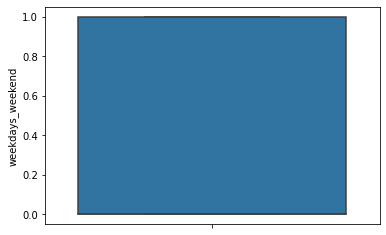

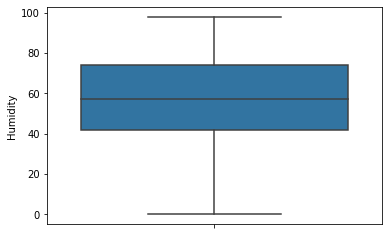

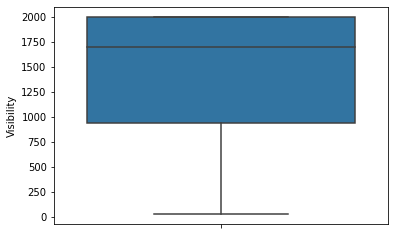

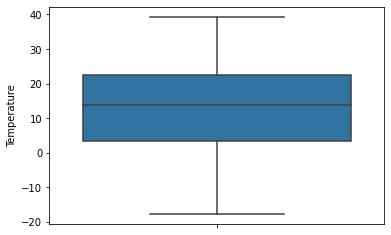

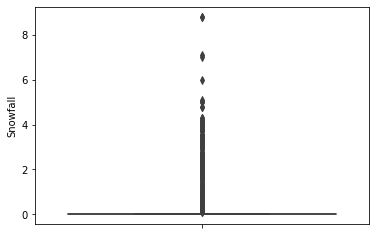

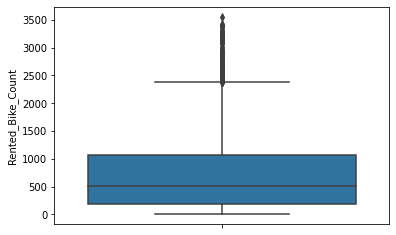

In [21]:
# Numerical features plotting

num_var = list(set(df.describe()))
for i in num_var:
    sns.boxplot(y = df[i])
    plt.show()

In [22]:
# cateogrical feature plotting

cat_var = list(set(df.describe(include = 'all')) - set(df.describe()))
cat_var

['Holiday', 'Functioning_Day', 'Seasons']

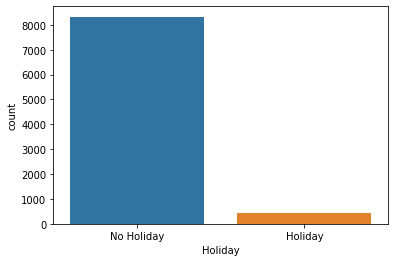

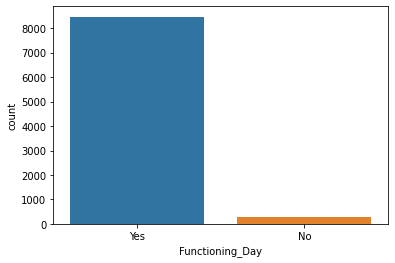

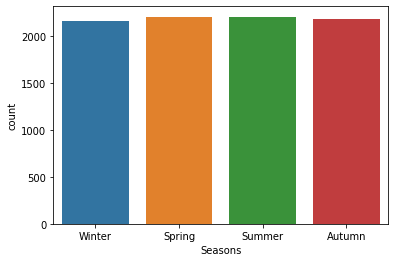

In [23]:
for i in cat_var:
    sns.countplot(x = df[i],)
    plt.show()

###**Bivariate Analysis :**

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

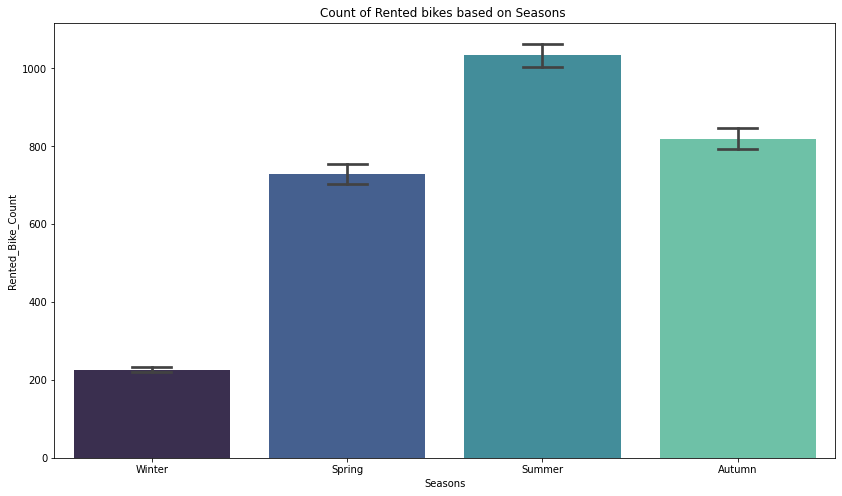

In [24]:
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Seasons ')

#### Obeservations:


*  Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.
*  This signifies that people enjoy bike riding in pleasant weather. 





[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

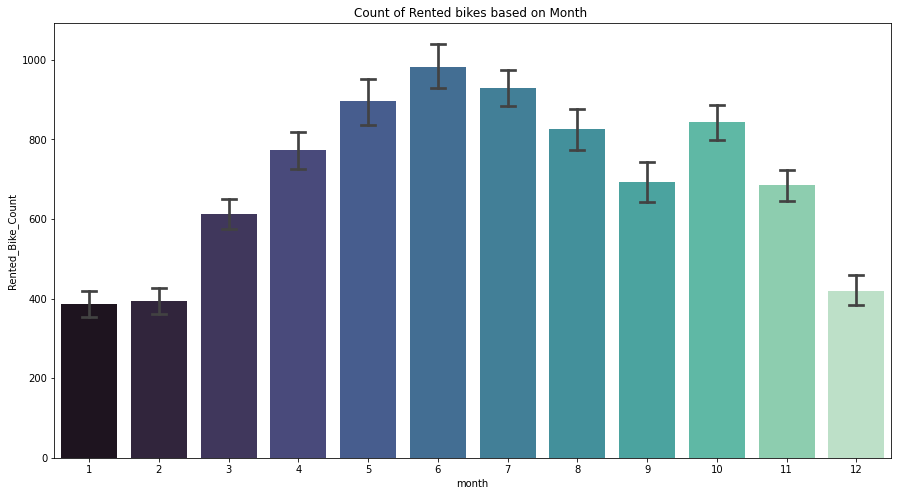

In [25]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

####Observation:

* The demand of the rented bike is high between **5** to **10** months as compare to other months.





[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

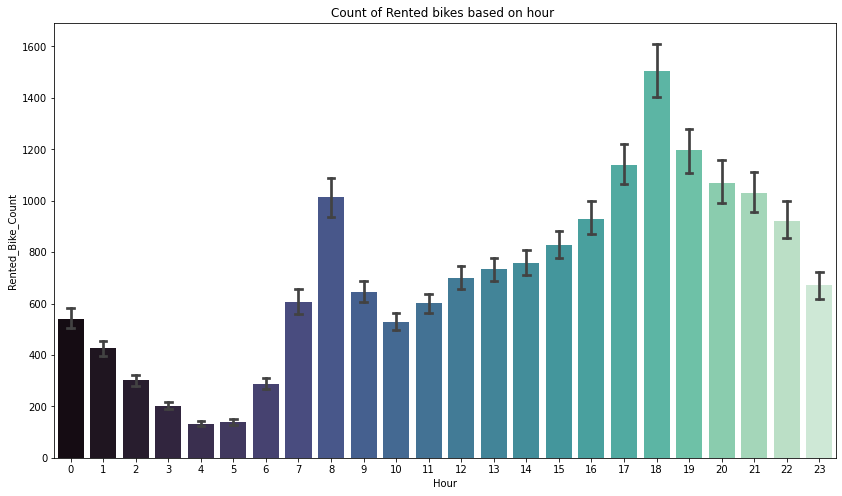

In [26]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

###Observation:


*   People generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

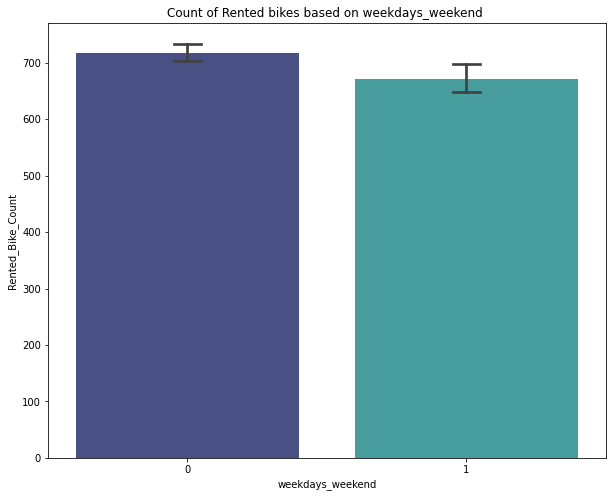

In [27]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

###Observation:


*   In the week days the demand of the bike is higher because of the office as compare to the weekend.



[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

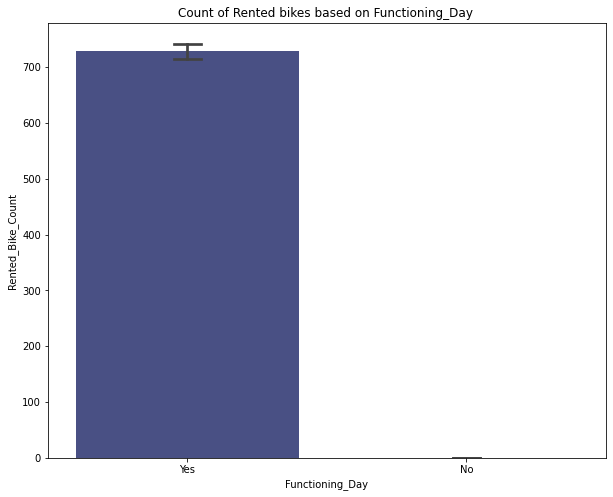

In [28]:
#anlysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on Functioning_Day ')

###Observation:


*  People use rented bike only in functioning day



[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

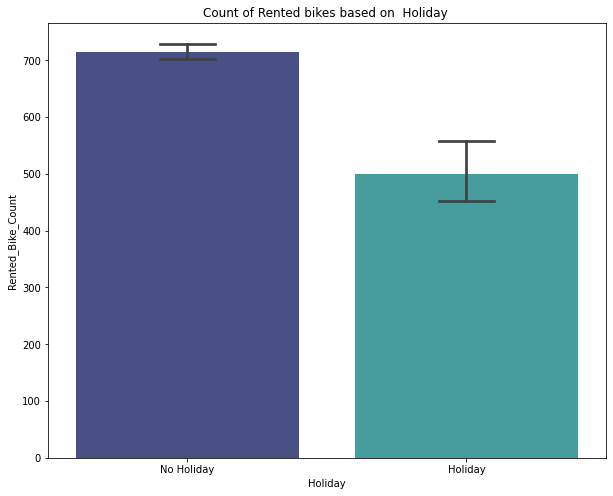

In [29]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

###Observation:


*  Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.



##**Visualizing The Distributions**

####**Visualizing numerical variables distplot :**

In [30]:
#assigning numerical coulmn to variable
num_feat= list(set(df.describe()))
num_feat

['Rainfall',
 'Wind_speed',
 'Solar_Radiation',
 'month',
 'Hour',
 'weekdays_weekend',
 'Humidity',
 'Visibility',
 'Temperature',
 'Snowfall',
 'Rented_Bike_Count']

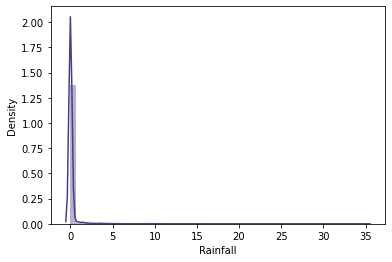

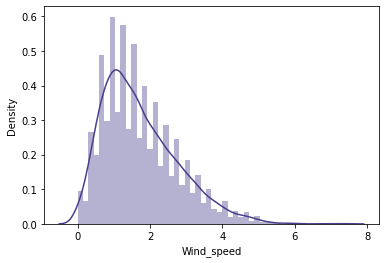

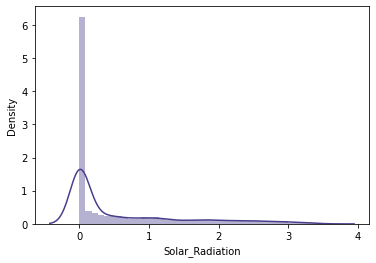

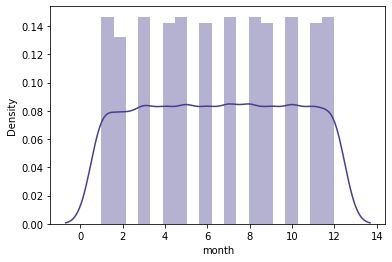

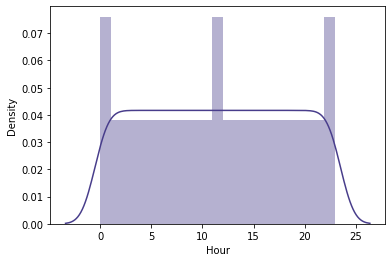

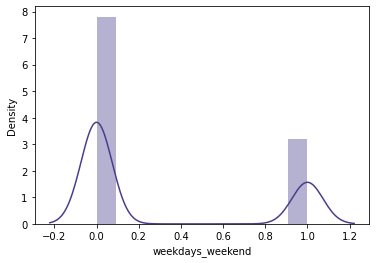

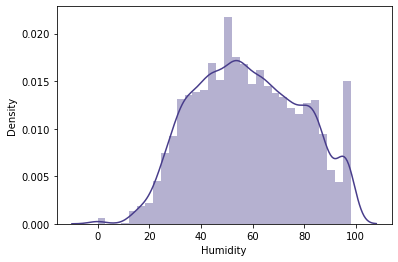

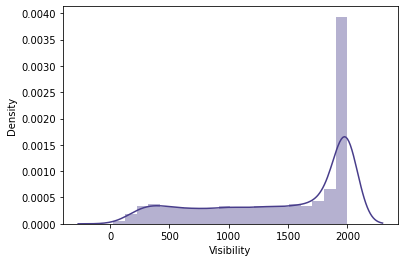

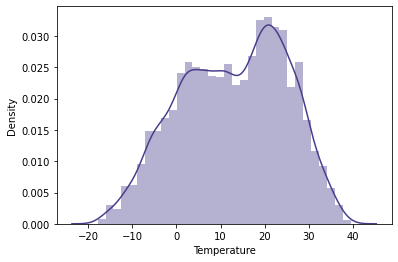

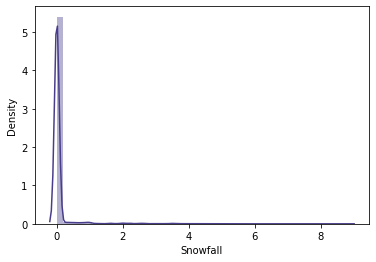

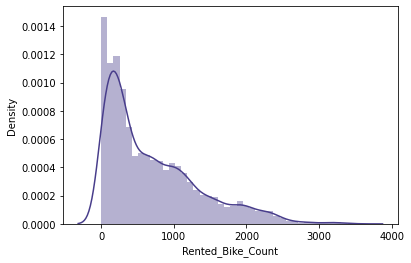

In [31]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()

###Observation:


*   Some of the distributions are rightly skewed while some are leftly skewed. 



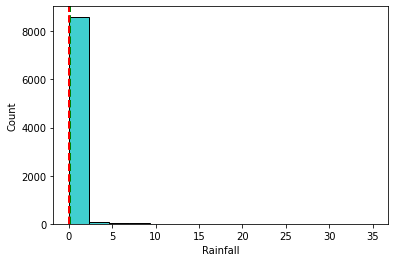

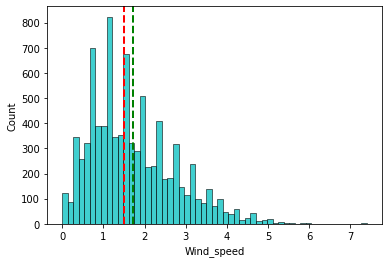

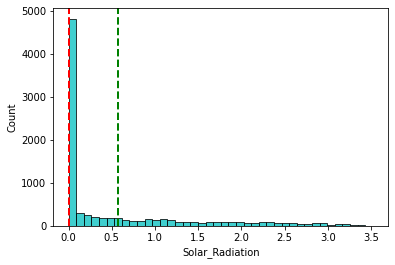

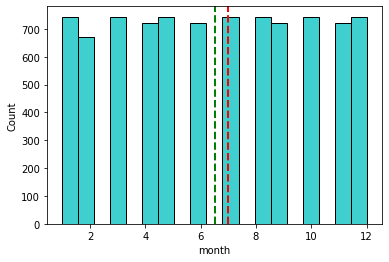

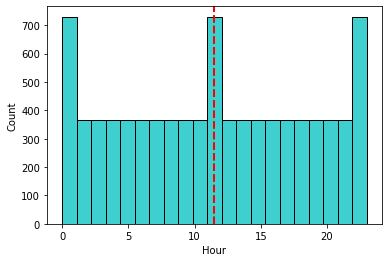

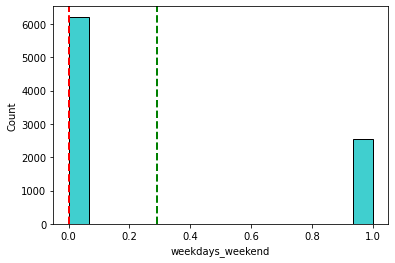

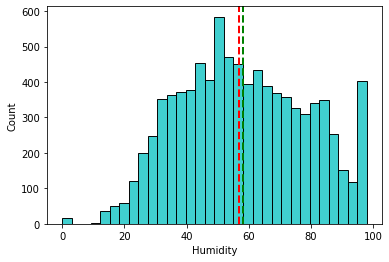

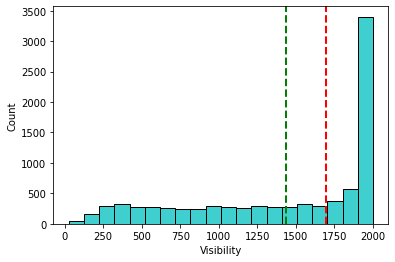

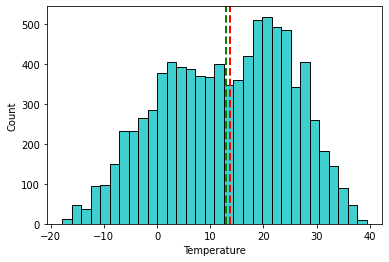

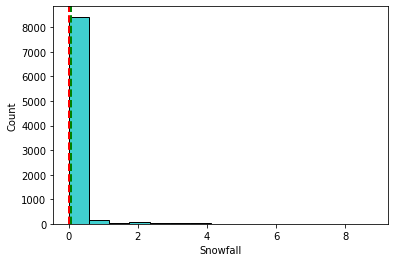

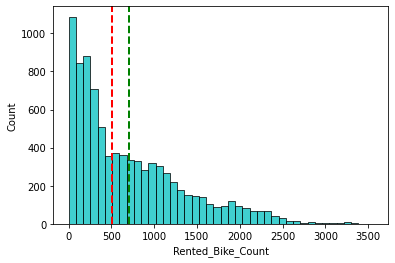

In [32]:
#plotting histogram with mean and median

for col in num_feat[:]:
  sns.histplot(df[col],color= 'c')
  plt.axvline(df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

####Observation:


*  The features which are skewed, their mean and the median are also skewed.



##**Regression Plotting Of Features**

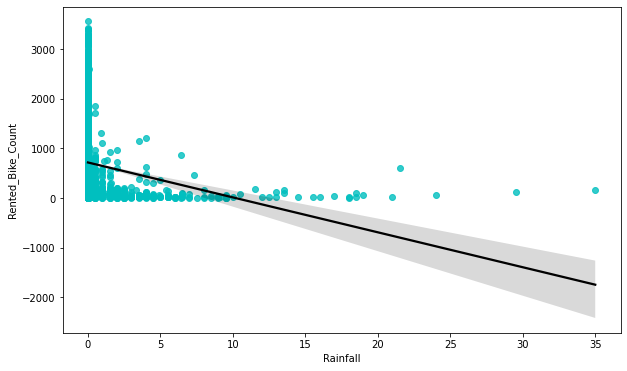

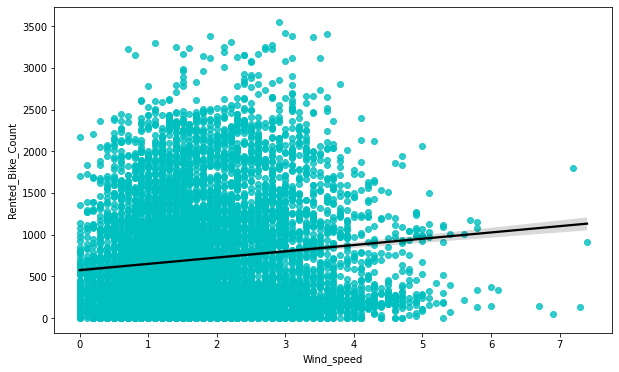

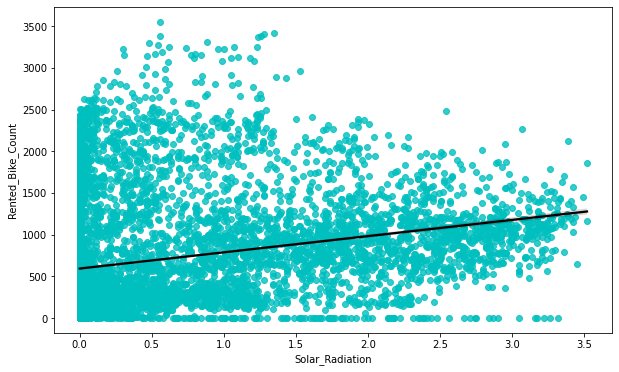

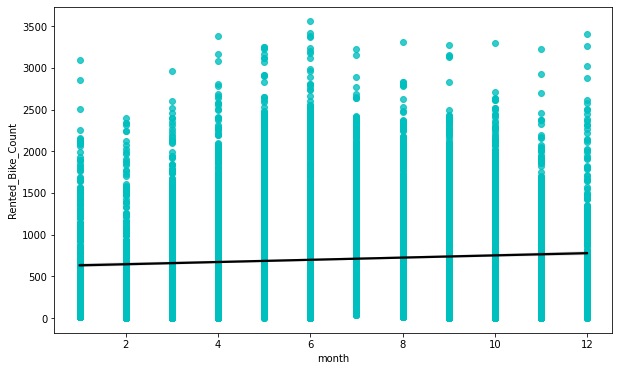

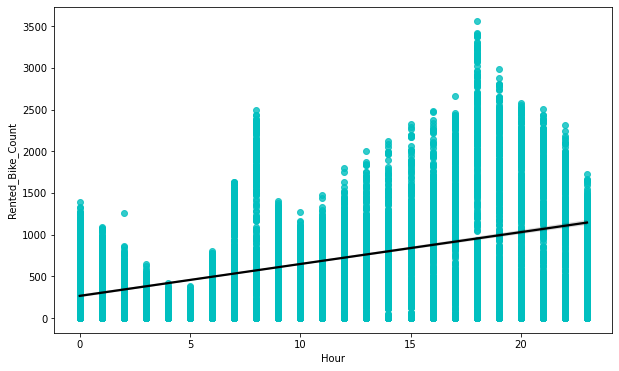

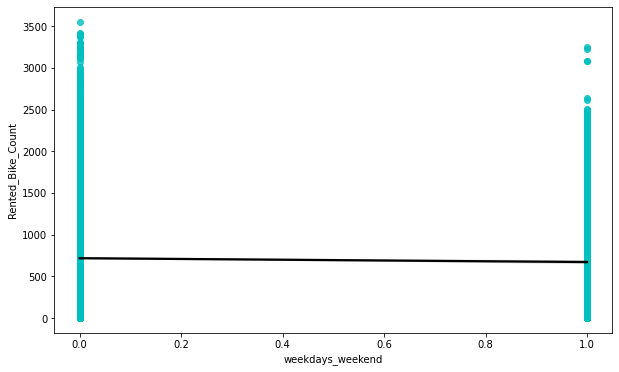

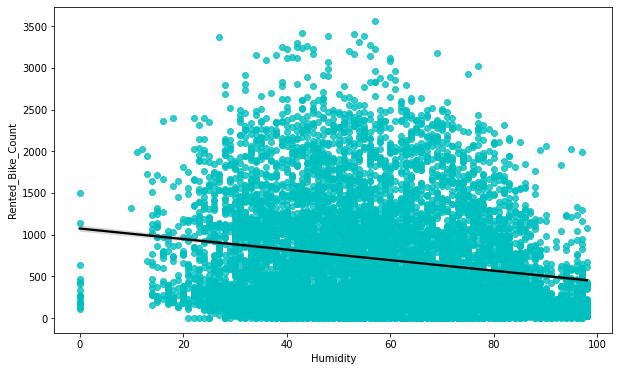

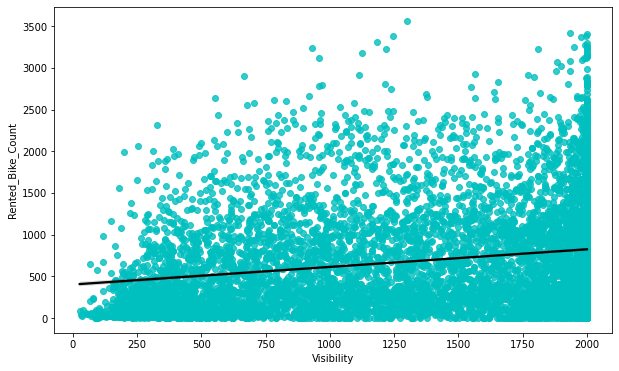

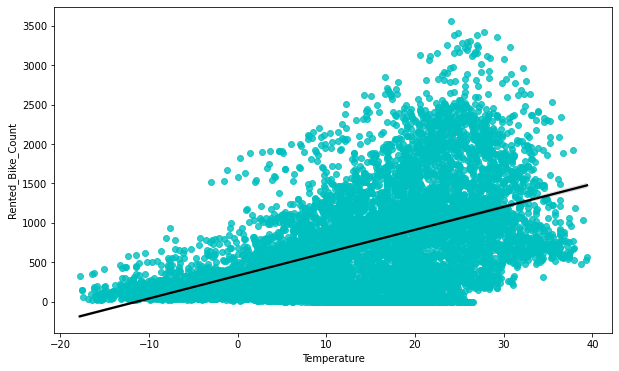

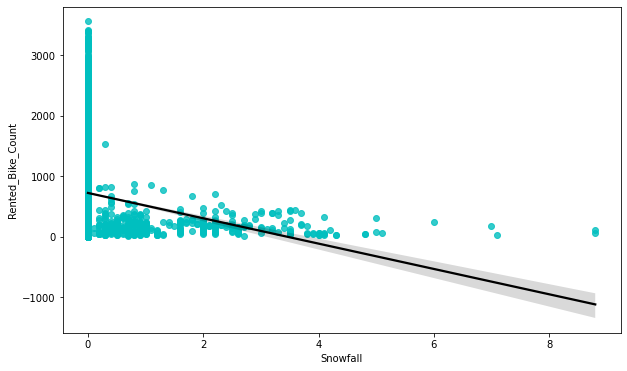

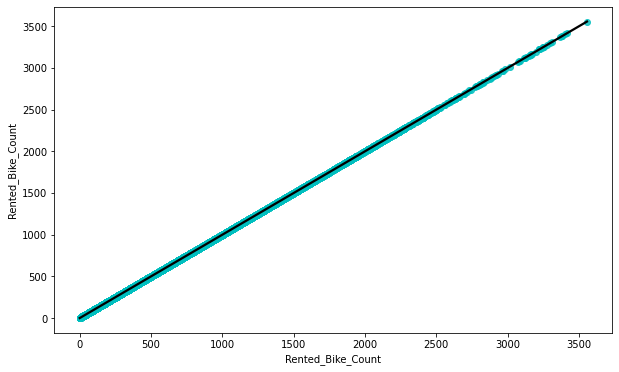

In [33]:
#plotting the regression plot for all the numerical features
for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

###Observations:


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.



###**Normalising Rented_Bike_Count Column Data.**

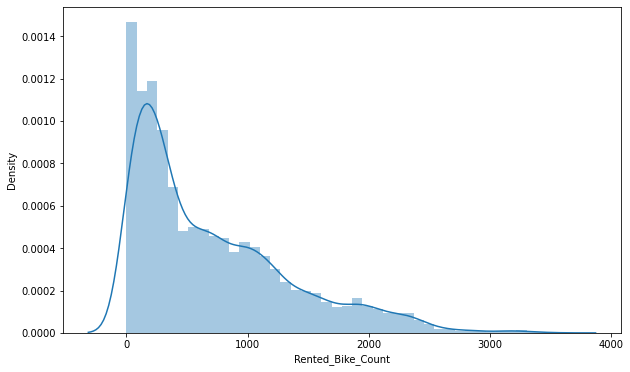

In [34]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df['Rented_Bike_Count'])


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.




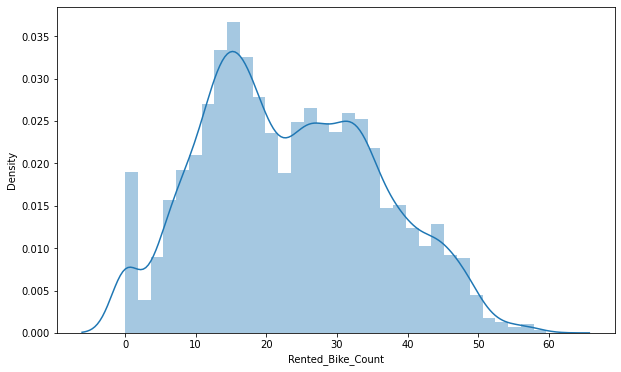

In [35]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))

######After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.

###**Creating dummy variables and performing the one hot encoding to the dataset**

In [36]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [38]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=True)
df1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0







# **Model training**
# ***Train test split for regression***

In [39]:
#Assigning the value in X and Y
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])

In [40]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

### Implementing Linear Regression ###

In [42]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [43]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [44]:
#checking the score
reg.score(X_train, y_train)

0.7557884266778845

In [45]:
#getting the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [46]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE ,RMSE,MAE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)



MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172


In [47]:

#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


Here r2 score value is 0.75 that means our model is able to capture most of the data variance.

In [48]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [49]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)


MSE : 36.64474647323363
MSE : 36.64474647323363
MSE : 36.64474647323363


In [50]:
#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)

R2 : 0.7680218977120631
Adjusted R2 : 0.762931808632916


The r2_score for the test set is 0.76, it means that our linear model is performing well on the data.



In [51]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

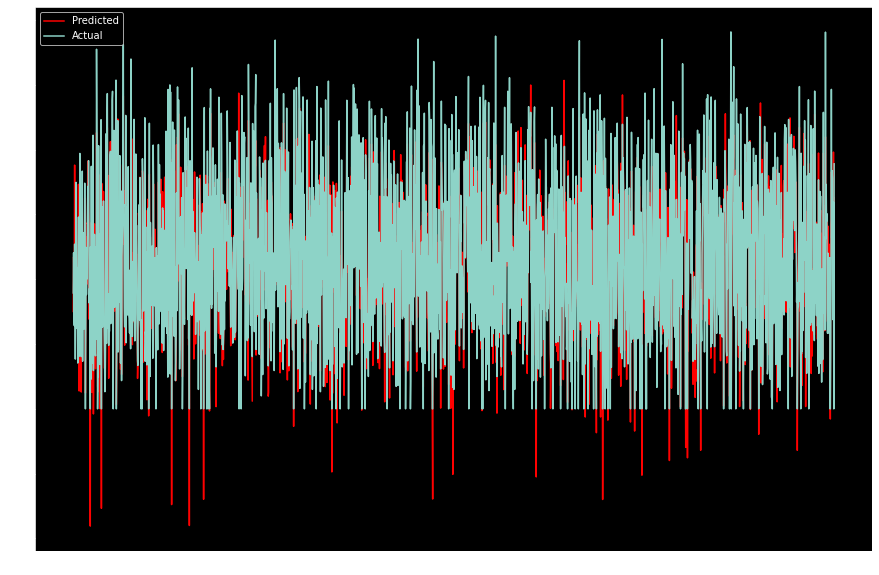

In [52]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.plot((y_pred_test),color='r')
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])

plt.show()

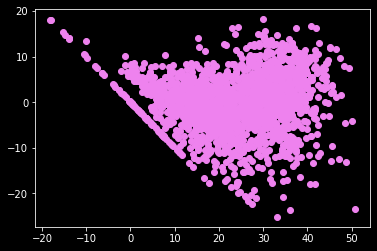

In [53]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='violet')

**Implementing lasso regression**

In [54]:
#Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [55]:
#getting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952


In [57]:
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


The r2 score is 0.40 so it means that our model is not able to capture most of the data variance.

In [58]:
# storinging the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [59]:
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)



MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607


In [60]:
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


The r2_score for the test set is 0.38 it means that our linear model is not performing well on the data.

In [61]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

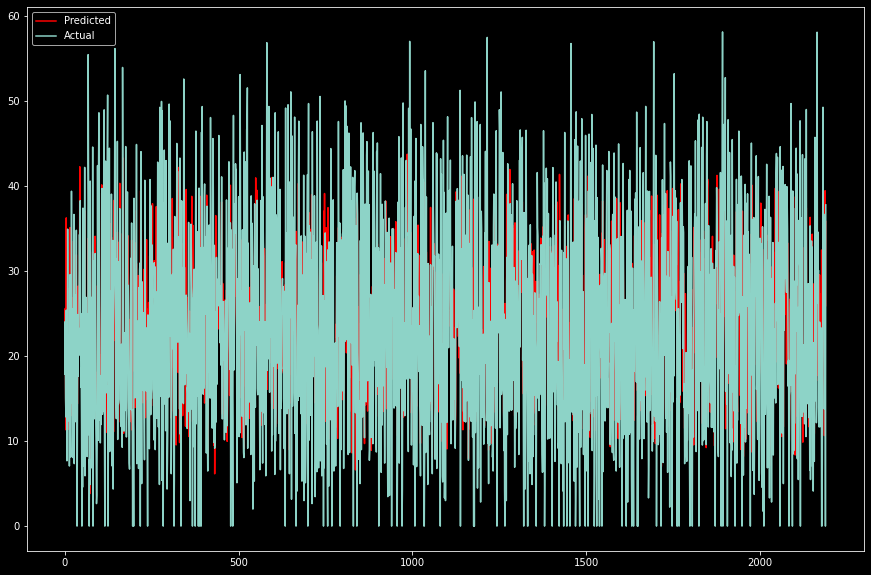

In [62]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.plot((np.array(y_pred_test_lasso)),color='red')
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

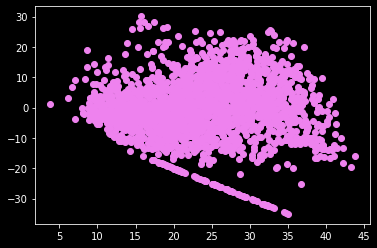

In [63]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso),color='violet')

**Implementing ridge regression**

In [64]:
#importing package
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [65]:
ridge.fit(X_train,y_train)


Ridge(alpha=0.1)

In [66]:
ridge.score(X_train, y_train)

0.7557883433655243

In [67]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [68]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE.MAE
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE)

MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368


In [69]:
#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


The r2 score value is 0.75 it means that our model is able to capture most of the data variance.

In [70]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [71]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE)


MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894


In [72]:
#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


 The r2_score for the test set is 0.76 it means that our linear model is performing well on the data.

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

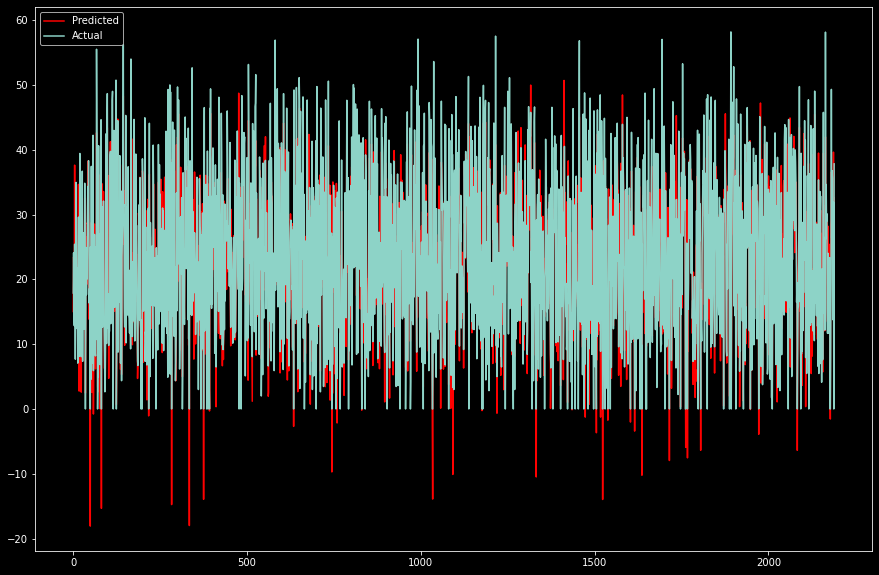

In [74]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.plot(((y_pred_test_ridge)),color='red')
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

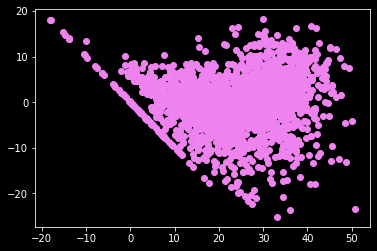

In [75]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),color='violet')

**Implementing Elastic net Regression**

In [76]:
#importing package
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [77]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [78]:
#checking score
elasticnet.score(X_train, y_train)

0.6152557713637432

In [79]:
#getting X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [80]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE)


MSE : 59.247024931621645
RMSE : 7.69720890528649
MAE : 5.891715220293744


In [81]:
#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6152557713637432
Adjusted R2 : 0.6068136711088861


The r2 score value is 0.62 it means that our model is able to capture most of the data variance.

In [82]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [83]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE)



MSE : 61.65141449800951
RMSE : 7.851841471782878
MAE : 6.0107752888670705


In [84]:
#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6097181856869531
Adjusted R2 : 0.601154579117059


The r2_score for the test set is 0.62 it means that our linear model is performing well on the data.

In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

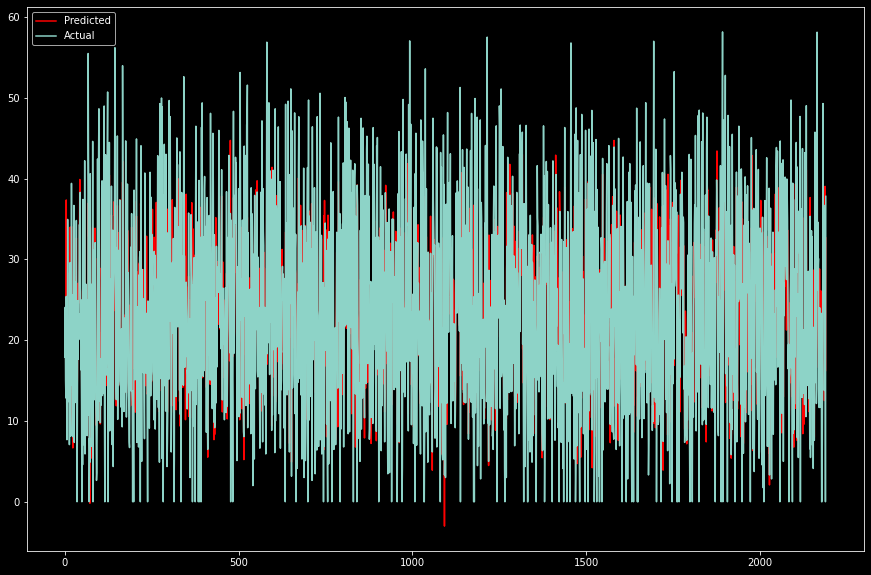

In [86]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.style.use('dark_background')

plt.plot((np.array(y_pred_test_en)),color='red')
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

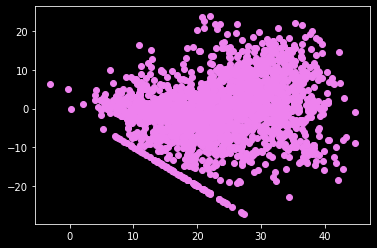

In [87]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),color='violet')


**Implementing Random Forest Regression**

In [88]:
#importing package
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [90]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE)



Model Score: 0.9862208106739039
MSE : 2.1218667176228503
RMSE : 1.456662870269868
MAE : 0.9530188455834621


In [91]:
#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_r)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2 : 0.9862208106739039
Adjusted R2 : 0.9859184661835554


The r2_score for the test set is 0.98 same as adjusted r2_score which shows that our linear model is performing well on the data

In [92]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [93]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE,RMSE.MAE
MSE= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE)

MSE : 15.77844976250968
RMSE : 3.9722096825960334
MAE : 2.5635916678108246


In [94]:
#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.900115154688651
Adjusted R2 : 0.8979234704077764


The r2_score for the test set is 0.89 same as adjusted r2_score which shows that our linear model is performing well on the data.





In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [96]:
rf_model.feature_importances_

array([3.16010601e-01, 1.61938342e-01, 1.36585530e-02, 1.40385591e-02,
       3.42098096e-02, 3.14101473e-02, 1.13624458e-03, 4.22170289e-03,
       1.33558549e-02, 2.00395042e-02, 2.81677381e-02, 2.46721859e-02,
       7.96943545e-03, 3.74678942e-03, 1.30914871e-02, 9.79302942e-04,
       2.29958153e-03, 1.04843156e-03, 2.09523626e-04, 1.91001726e-04,
       3.48660277e-04, 1.36566735e-03, 3.73802677e-03, 1.04551938e-02,
       3.09889014e-02, 1.76548211e-02, 1.29979022e-02, 1.35160950e-02,
       1.06156875e-02, 4.28934533e-03, 5.77357977e-03, 1.44174154e-03,
       8.68931211e-03, 3.09711956e-03, 1.53765858e-01, 1.02043473e-03,
       2.95556461e-03, 1.43919032e-03, 1.59381444e-03, 1.61971912e-03,
       1.30467423e-03, 1.94711120e-03, 1.69574096e-03, 1.81503136e-03,
       3.28772966e-03, 6.49086351e-04, 9.53919534e-03])

In [97]:
features = X_train.columns
importance = rf_model.feature_importances_
index = np.argsort(importance)

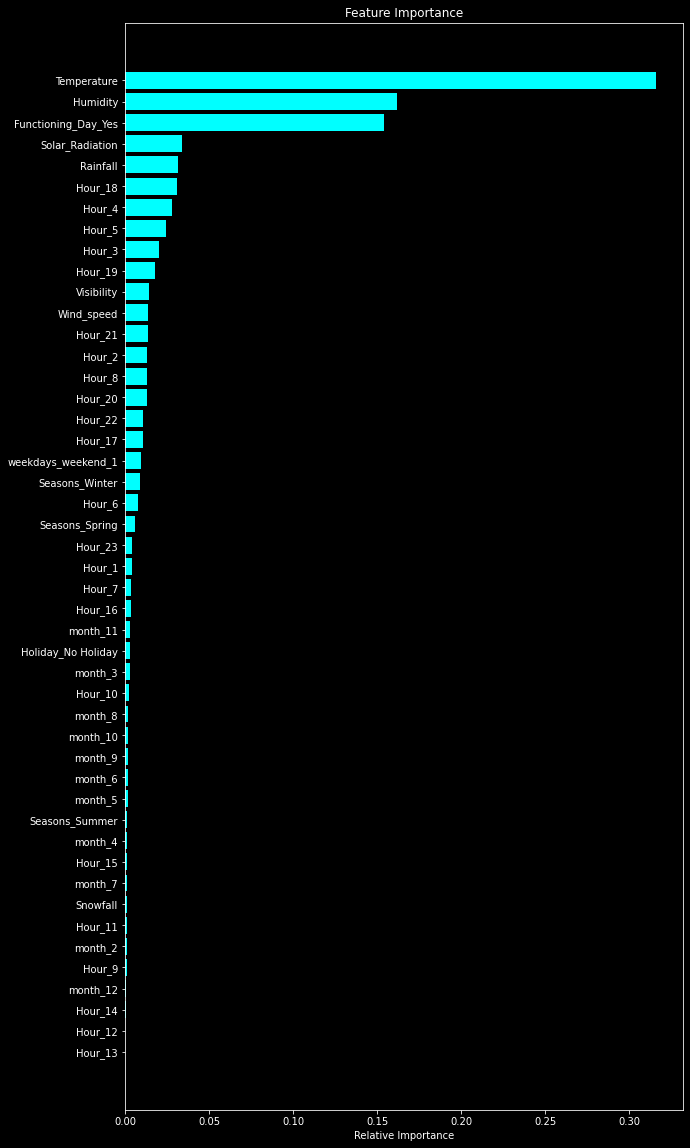

In [98]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='cyan', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

plt.show()

**Implementing XGBOOSTING Regression**

In [99]:
#importing package
import xgboost as xgb

In [100]:
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [101]:
# Creating an instance of the XGBoostingRegressor
xg_boost =xgb.XGBRegressor()

In [102]:
xg_boost.fit(X_train,y_train)

[12:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [103]:
# Making predictions on train and test data

y_pred_train_xg = xg_boost.predict(X_train)
y_pred_test_xg = xg_boost.predict(X_test)

In [104]:
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_xg)
print("MAE :",MAE)

MSE : 21.073184205244345
RMSE : 4.590553801584766
MAE : 3.4604088000898527


In [105]:
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8631528585390765
Adjusted R2 : 0.8601501434836781


The r2_score for the test set is 0.86 is slightly same as adjusted r2_score which shows that our linear model is performing well on the data

In [106]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XG Boost Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [107]:
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_xg)
print("MAE :",MAE)

MSE : 23.708875814619123
RMSE : 4.869176091970707
MAE : 3.6695411336005646


In [108]:
#calculating r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_xg)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_test, y_pred_test_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8499119096683334
Adjusted R2 : 0.8466186602539598


In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XG Boost Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [110]:
xg_boost.feature_importances_

array([6.8816982e-02, 4.4810779e-02, 2.3555274e-03, 2.5329739e-03,
       4.1063119e-02, 5.5038329e-02, 0.0000000e+00, 6.4617880e-03,
       2.3201618e-02, 3.6660902e-02, 4.7320101e-02, 3.9830729e-02,
       2.1765575e-02, 0.0000000e+00, 1.9511521e-02, 0.0000000e+00,
       1.3451007e-02, 9.3416190e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.7891222e-03, 2.1720586e-02,
       5.4531179e-02, 4.8402470e-02, 3.2616664e-02, 4.7736190e-02,
       4.3025091e-02, 5.7156137e-03, 3.6076470e-03, 3.3062031e-03,
       7.1470596e-02, 7.8896089e-03, 1.7300019e-01, 0.0000000e+00,
       5.1428024e-03, 2.7018555e-03, 0.0000000e+00, 7.1089650e-03,
       6.1454356e-04, 0.0000000e+00, 1.4060320e-04, 1.3129831e-02,
       1.1029454e-02, 1.8275700e-03, 9.3307337e-03], dtype=float32)

In [111]:
features = X_train.columns
importance = xg_boost.feature_importances_
index = np.argsort(importance)

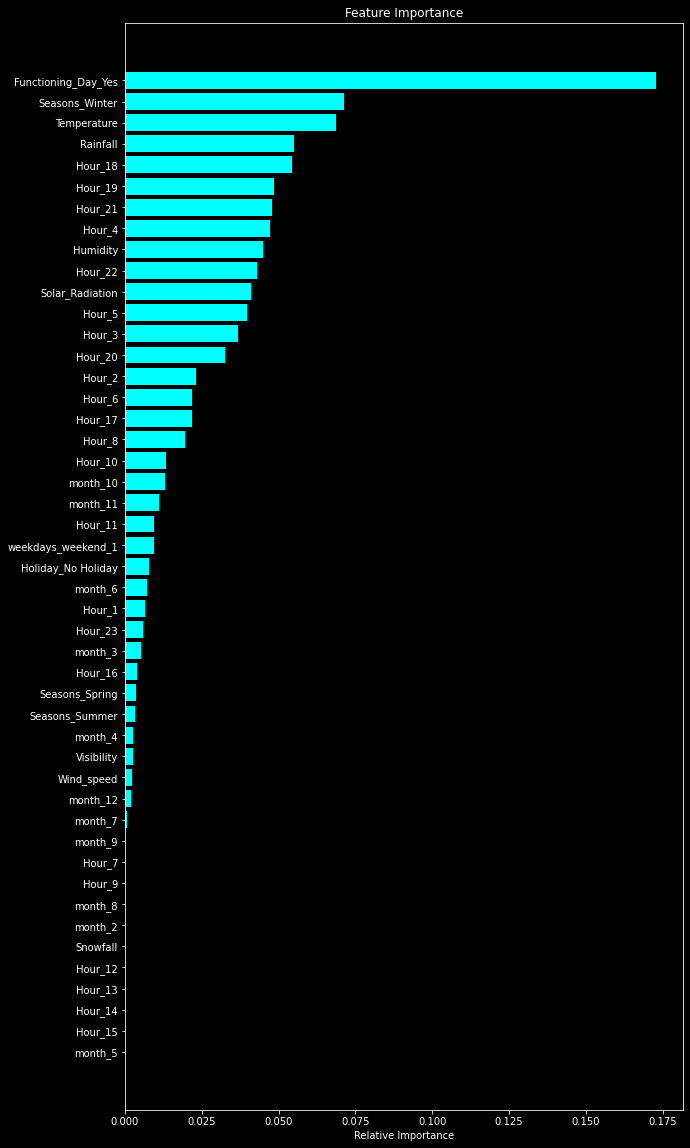

In [112]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='cyan', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

plt.show()

**Hyperparameter Tuning**

**XG Boost Regressor with GridSearchCV**

In [113]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [114]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [115]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[12:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[12:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[12:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[12:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[12:42:20] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [116]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [117]:
xg_optimal_model = xg_grid.best_estimator_


In [118]:
# Making predictions on train and test data

y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [119]:
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_train, y_pred_train_xg_opt)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_train, y_pred_train_xg_opt)
print("MAE :",MAE)

MSE : 4.059746697992111
RMSE : 2.0148813111426964
MAE : 1.377916686777391


In [120]:
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_xg_opt)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


R2 : 0.9736364127383567
Adjusted R2 : 0.9730579400019901


In [121]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XG Boost Regression with grid search cv',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [122]:
#calculating MSE,RMSE,MAE
MSE= mean_squared_error(y_test, y_pred_test_xg_opt)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
MAE= mean_absolute_error(y_test, y_pred_test_xg_opt)
print("MAE :",MAE)

MSE : 13.980201717845725
RMSE : 3.7390107940263726
MAE : 2.5267025048184246


In [123]:
#calculating r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_xg_opt)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9114988920314332
Adjusted R2 : 0.9095569909695645


In [124]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XG Boost Regression with grid search cv',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [125]:
xg_optimal_model.feature_importances_

array([0.02025816, 0.0174529 , 0.00126562, 0.00145027, 0.00661327,
       0.03226612, 0.00181978, 0.004811  , 0.04044073, 0.04802452,
       0.05630353, 0.05240968, 0.02179706, 0.006768  , 0.02456177,
       0.00290274, 0.01054254, 0.0090678 , 0.00190597, 0.00179658,
       0.00117202, 0.00228033, 0.00532703, 0.03668127, 0.06595007,
       0.04854019, 0.05957427, 0.04715436, 0.04674775, 0.01496609,
       0.0083527 , 0.00265786, 0.05144427, 0.00313029, 0.2094047 ,
       0.001649  , 0.0019836 , 0.0021212 , 0.00295584, 0.00600426,
       0.00126908, 0.00265012, 0.00212533, 0.00450596, 0.00384445,
       0.0007825 , 0.00426742], dtype=float32)

In [126]:
xg_optimal_model.fit(X_train,y_train)

[12:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [127]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

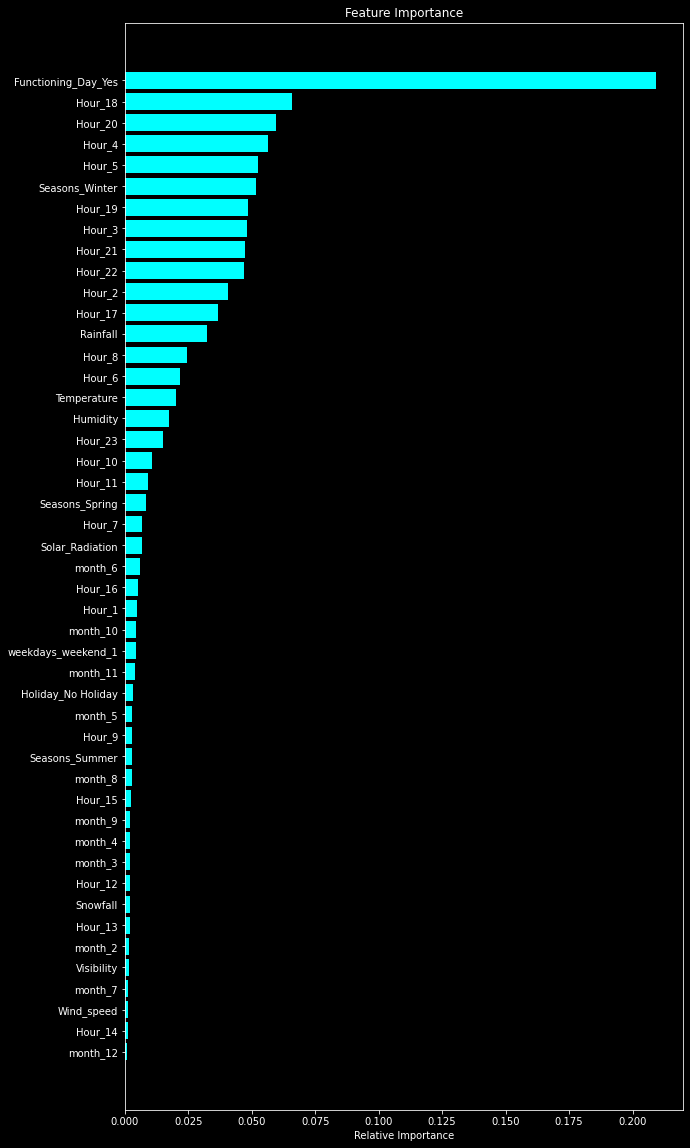

In [128]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='cyan', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

plt.show()

**CONCLUSION**

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [129]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0                       Linear regression   4.658  37.606  6.132   
             1                        Lasso regression   7.255  91.594  9.570   
             2                        Ridge regression   4.658  37.606  6.132   
             3                  Elastic net regression   5.892  59.247  7.697   
             4                Random forest regression   0.953   2.122  1.457   
             5                     XG Boost Regression   3.460  21.073  4.591   
             6  XG Boost Regression with grid search cv  1.378   4.060  2.015   
Test set     0                       Linear regression   4.658  36.645  6.132   
             1                        Lasso regression   7.456  96.775  9.837   
             2                        Ridge regression   4.659  36.647  6.054   
             3              Elastic net regression Test  6.011  61.651  7.852   
             4                Random forest regression   2.564  15.778  3.972   
             5                     XG Boost Regression   3.670  23.709  4.869   
             6  XG Boost Regression with grid search cv  2.527  13.980  3.739   

                R2_score  Adjusted R2  
Training set 0     0.756         0.75  
             1     0.405         0.39  
             2     0.756         0.75  
             3     0.615         0.61  
             4     0.986         0.99  
             5     0.863         0.86  
             6     0.974         0.97  
Test set     0     0.768         0.76  
             1     0.387         0.37  
             2     0.768         0.76  
             3     0.610         0.60  
             4     0.900         0.90  
             5     0.850         0.85  
             6     0.911         0.91

**Final Observations:**

*   **No overfitting is seen.**

*    **Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**
*  **We can deploy this model.**
